In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scale
from sklearn.preprocessing import StandardScaler

# KMeans Clustering
from sklearn.cluster import KMeans

# Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
dat = pd.read_csv(r'E:\upgrad files\excel datasets\Country-data.csv')

In [3]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
dat.shape

(167, 10)

In [57]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
 10  labels      167 non-null    int32  
dtypes: float64(9), int32(1), object(1)
memory usage: 13.8+ KB


In [5]:
# Convert exports, imports and health spending percentages to absolute values
dat['exports'] = dat['exports']*dat['gdpp']/100
dat['imports'] = dat['imports']*dat['gdpp']/100
dat['health'] = dat['health']*dat['gdpp']/100

In [6]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# EDA

In [7]:
col = dat.columns
col

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
col = col[1:]
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Univariate Analysis

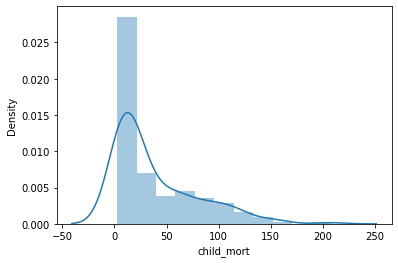

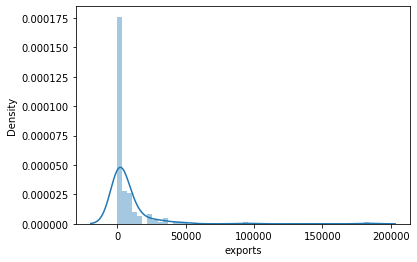

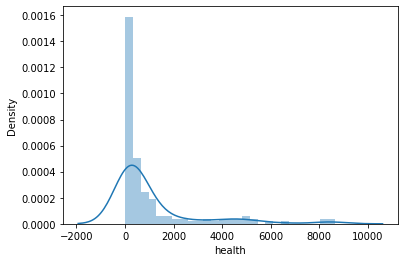

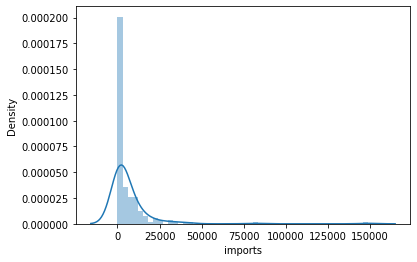

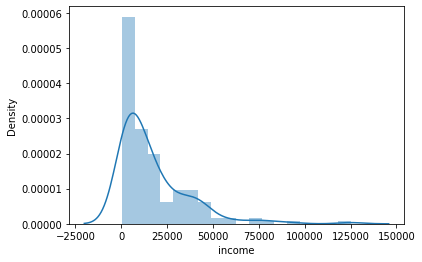

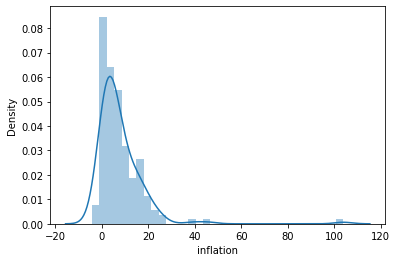

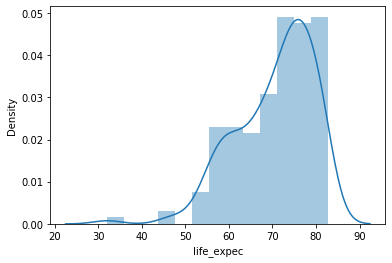

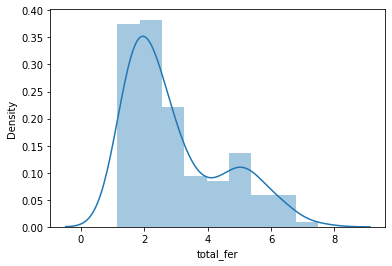

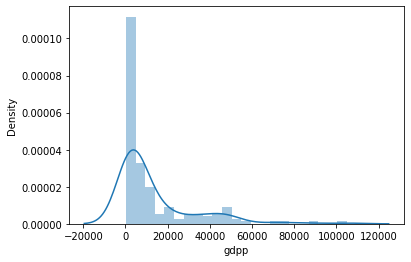

In [9]:
# distplot
for c in col:
    sns.distplot(dat[c])
    plt.show();

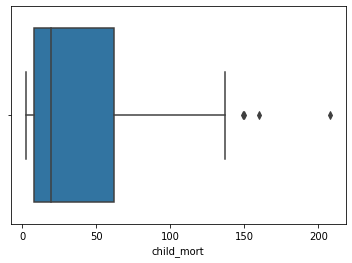

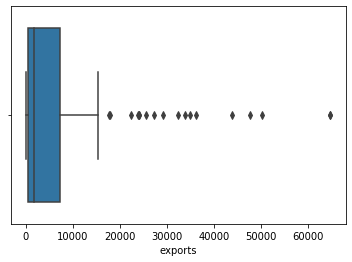

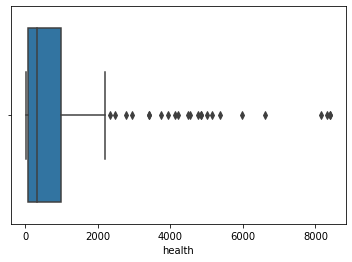

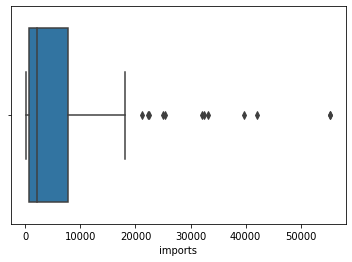

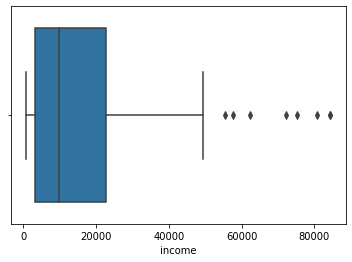

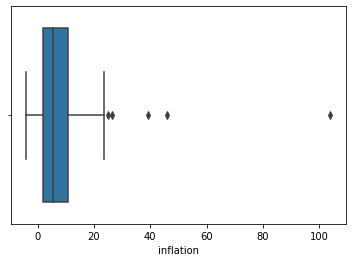

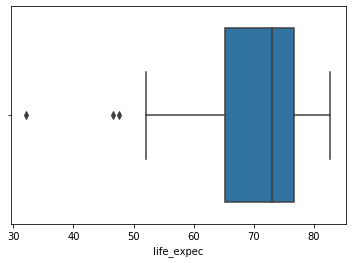

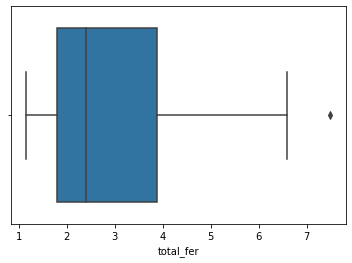

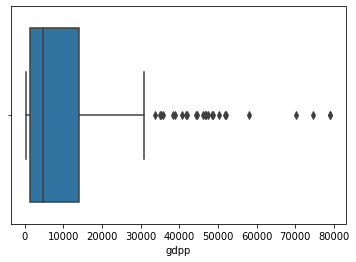

In [61]:
for c in col:
    sns.boxplot(dat[c])
    plt.show();

# Bivariate Analysis

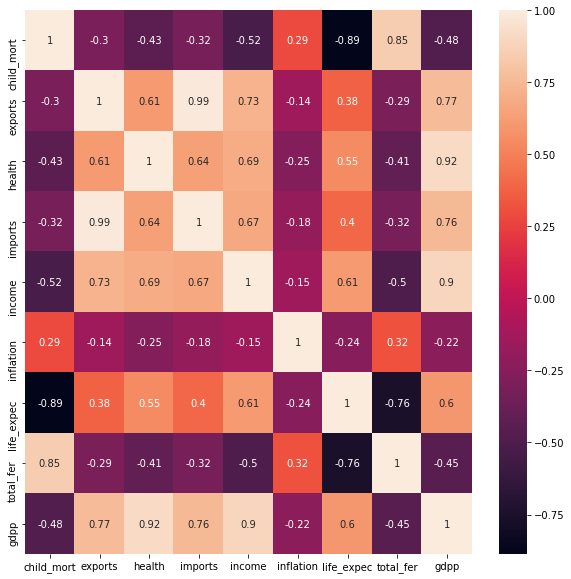

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(dat[col].corr(), annot=True);

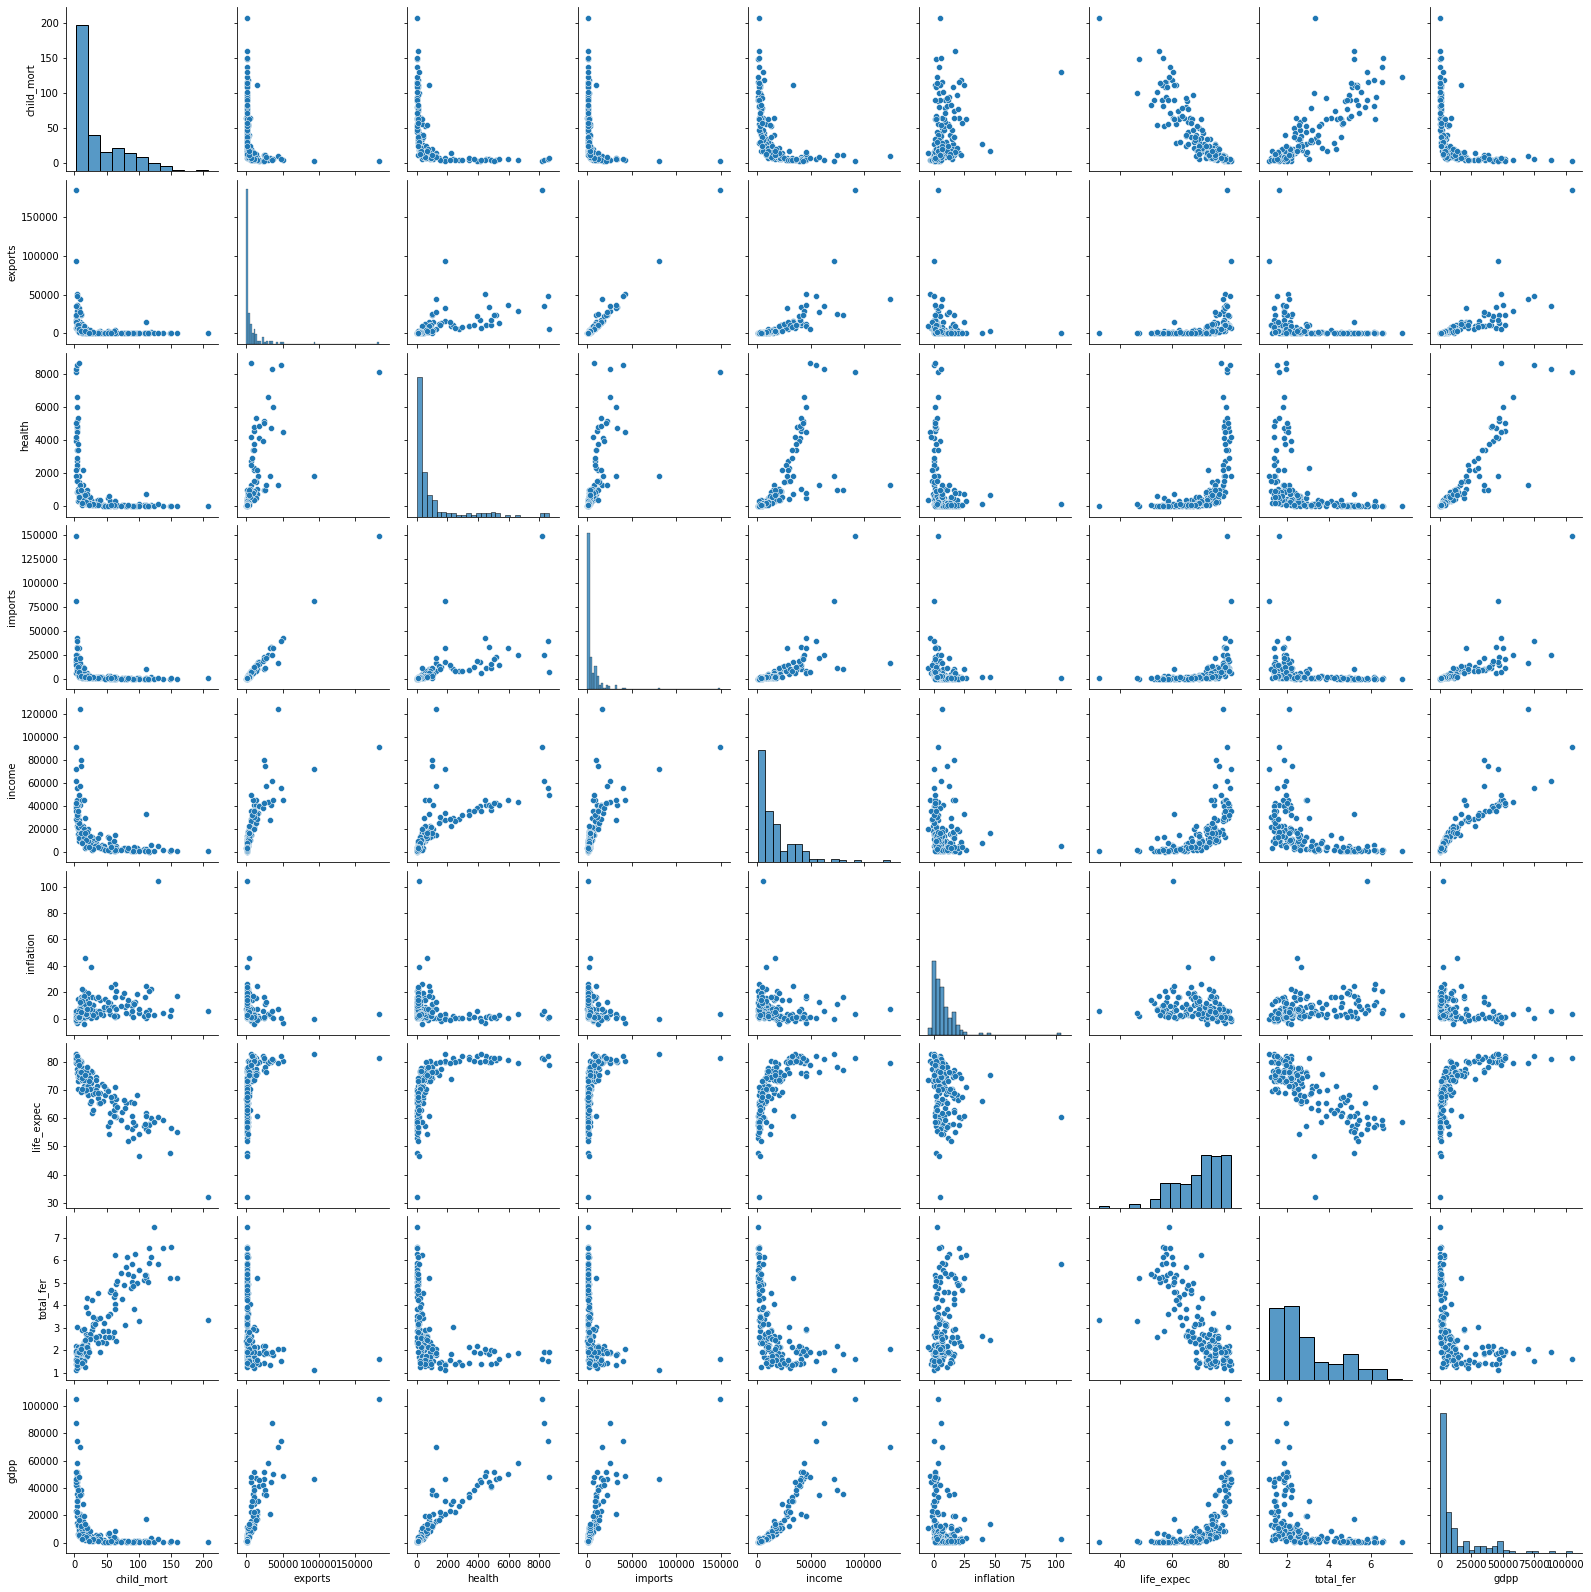

In [11]:
sns.pairplot(dat)
plt.show();

# Outlier Treatment

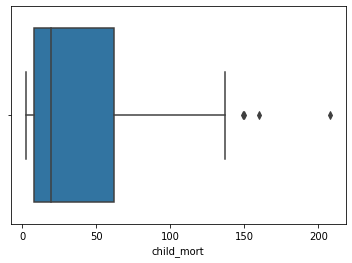

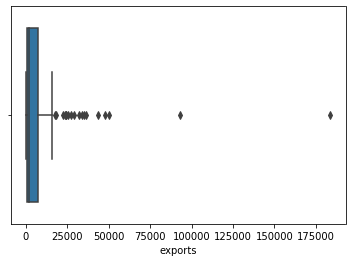

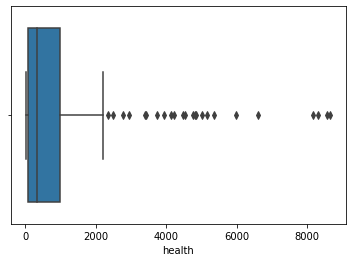

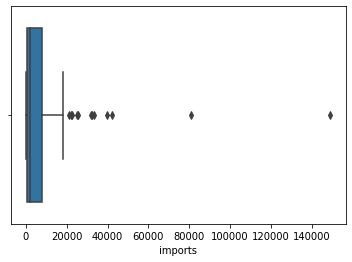

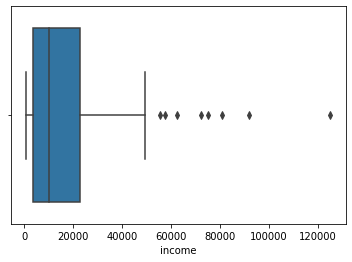

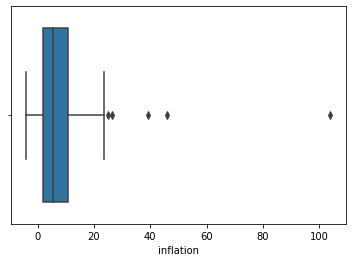

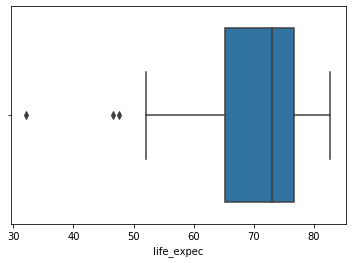

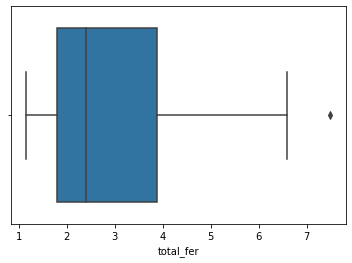

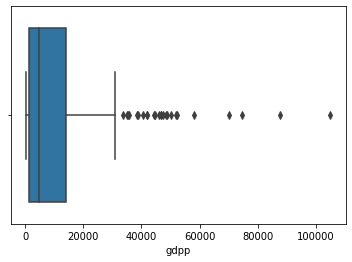

In [12]:
for c in col:
    sns.boxplot(dat[c])
    plt.show();

In [69]:
# To remove outlier we will do Hard capping on exports,health,imports,income,gdpp in upper range.
q1 = dat['exports'].quantile(0.01)
q2 = dat['exports'].quantile(0.95)
print(q1,q2)

70.4688 30756.569999999956


In [63]:
dat['exports'][dat['exports']<=q1] = q1
dat['exports'][dat['exports']>=q2] = q2

In [64]:
f=['health','imports','income','gdpp']
f

['health', 'imports', 'income', 'gdpp']

In [70]:
for i in f:
    q3 = dat[i].quantile(0.01)
    q4 = dat[i].quantile(0.95)

    dat[i][dat[i]<=q3] = q3
    dat[i][dat[i]>=q4] = q4
    


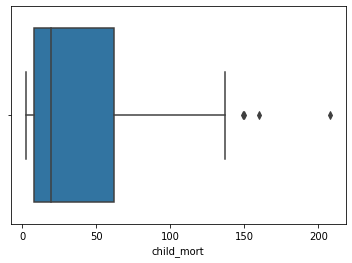

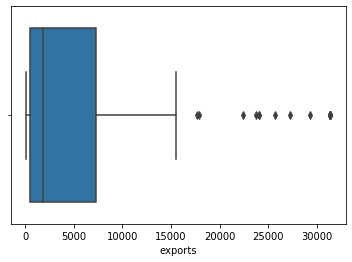

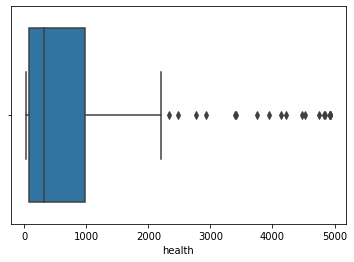

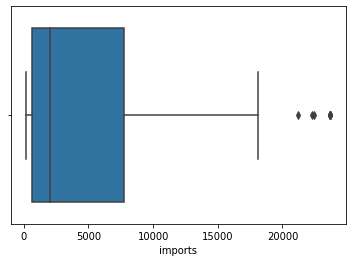

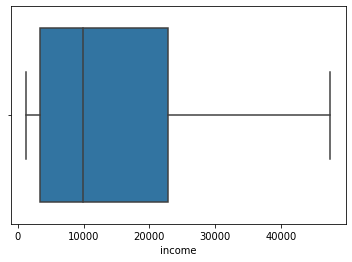

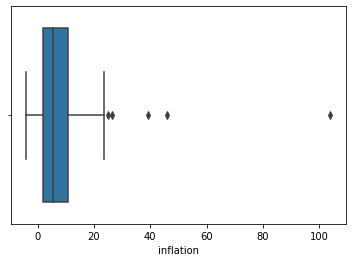

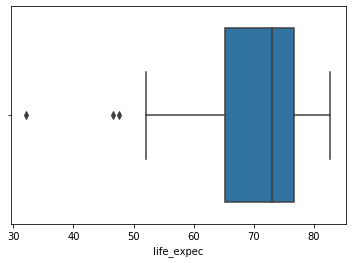

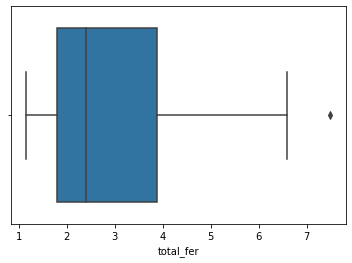

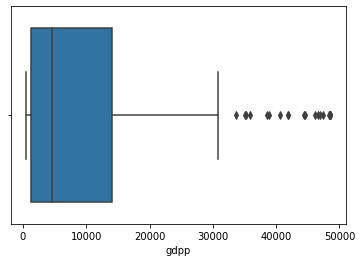

In [71]:
for c in col:
    sns.boxplot(dat[c])
    plt.show();

# Check the cluster tendancy: Hopkin's Test

In [18]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
# How different your data is from randomly scattered data
for i in range(20):
    print(hopkins(dat.drop('country', axis=1)),end=' | ')

0.9250906783602632 | 0.913739746667526 | 0.8883568532935677 | 0.9532417939699332 | 0.8455350769852589 | 0.840258088126527 | 0.8787312214920224 | 0.8540054283147858 | 0.9304009818464584 | 0.8677163901409843 | 0.8971870437370136 | 0.892838169064874 | 0.8420919957230573 | 0.8503293071307297 | 0.901826650742866 | 0.9592713570781569 | 0.8048072046156807 | 0.9021335630156002 | 0.8995094187695496 | 0.8894470348144636 | 

# Scaling

In [20]:
ss = StandardScaler()
dat1 = ss.fit_transform(dat.drop("country",axis=1))
dat1

array([[ 1.29153238, -0.56963804, -0.56698288, ..., -1.61909203,
         1.90288227, -0.70231404],
       [-0.5389489 , -0.47387318, -0.44041711, ...,  0.64786643,
        -0.85997281, -0.49877488],
       [-0.27283273, -0.42401465, -0.48629503, ...,  0.67042323,
        -0.0384044 , -0.47748297],
       ...,
       [-0.37231541, -0.49162206, -0.54027452, ...,  0.28695762,
        -0.66120626, -0.65875194],
       [ 0.44841668, -0.53996578, -0.55245405, ..., -0.34463279,
         1.14094382, -0.65875194],
       [ 1.11495062, -0.52703195, -0.54229642, ..., -2.09278484,
         1.6246091 , -0.65012008]])

In [21]:
dat1 = pd.DataFrame(dat1)
dat1.columns = col
dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569638,-0.566983,-0.598844,-0.851772,0.157336,-1.619092,1.902882,-0.702314
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.387025,-0.312347,0.647866,-0.859973,-0.498775
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.221124,0.789274,0.670423,-0.038404,-0.477483
3,2.007808,-0.381264,-0.534113,-0.464070,-0.612136,1.387054,-1.179234,2.128151,-0.531000
4,-0.695634,-0.086754,-0.178431,0.139659,0.125202,-0.601749,0.704258,-0.541946,-0.032079


# Find the best value of k: SSD, Silhoutte Score

In [22]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(dat1)
    ss.append([k, silhouette_score(dat1, kmean.labels_)])
    
ss

[[2, 0.4785902832043105],
 [3, 0.4225126950446896],
 [4, 0.40836164554144383],
 [5, 0.4148202586955944],
 [6, 0.31580338131095403],
 [7, 0.2972732306927687],
 [8, 0.29772050690030744],
 [9, 0.3109299043573063],
 [10, 0.28224113727722416]]

In [23]:
sil = pd.DataFrame(ss)
sil

,0,1
0,2,0.478590
1,3,0.422513
2,4,0.408362
3,5,0.414820
4,6,0.315803
5,7,0.297273
6,8,0.297721
7,9,0.310930
8,10,0.282241


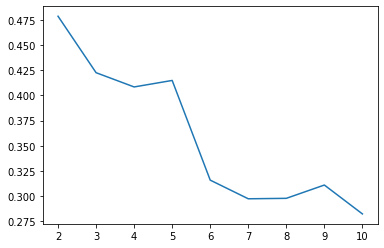

In [24]:
plt.plot(sil[0], sil[1]);

In [25]:
# SSD: Elbow

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(dat1)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 851.7317464358368],
 [3, 561.6442859177502],
 [4, 449.8523132568309],
 [5, 370.5945868235599],
 [6, 327.0560061736403],
 [7, 296.00510921509056],
 [8, 269.4240610781951],
 [9, 245.0450549701582],
 [10, 223.03651680572824]]

In [26]:
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,851.731746
1,3,561.644286
2,4,449.852313
3,5,370.594587
4,6,327.056006
5,7,296.005109
6,8,269.424061
7,9,245.045055
8,10,223.036517


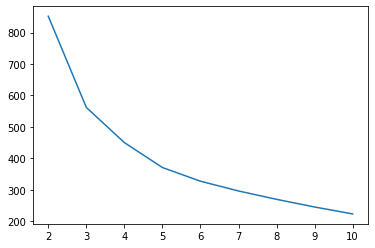

In [27]:
plt.plot(ssd[0],ssd[1]);

# KMeans with K==3
# Using the final value of k, perform final KMeans Analysis

In [75]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(dat1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [76]:
# Centroids
kmeans.cluster_centers_

array([[ 1.32661038e+00, -4.97254458e-01, -5.26084868e-01,
        -5.37206064e-01, -7.23798058e-01,  3.91812367e-01,
        -1.27627565e+00,  1.35434180e+00, -6.24143904e-01,
         4.16666667e-02,  2.00000000e+00],
       [-4.00730152e-01, -3.47716043e-01, -3.74349039e-01,
        -3.27714462e-01, -3.00520094e-01, -2.76207066e-02,
         2.61158281e-01, -4.46952481e-01, -3.91040694e-01,
         2.50000000e-02,  1.33226763e-15],
       [-8.10740675e-01,  1.32526916e+00,  1.41538453e+00,
         1.33341149e+00,  1.50727985e+00, -4.25572746e-01,
         1.03509151e+00, -7.50056609e-01,  1.57031187e+00,
         1.00000000e+00,  2.53846154e+00]])

In [77]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [78]:
# Now we will assign labels to our original df
dat1['labels'] = kmeans.labels_

In [79]:
dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,labels
0,1.291532,-0.569638,-0.566983,-0.598844,-0.851772,0.157336,-1.619092,1.902882,-0.702314,0,0
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.387025,-0.312347,0.647866,-0.859973,-0.498775,0,1
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.221124,0.789274,0.670423,-0.038404,-0.477483,0,1
3,2.007808,-0.381264,-0.534113,-0.464070,-0.612136,1.387054,-1.179234,2.128151,-0.531000,0,0
4,-0.695634,-0.086754,-0.178431,0.139659,0.125202,-0.601749,0.704258,-0.541946,-0.032079,0,1


In [80]:
dat1['labels'].value_counts()

1    80
0    48
2    39
Name: labels, dtype: int64

# Visualize the cluster using a scatter plots

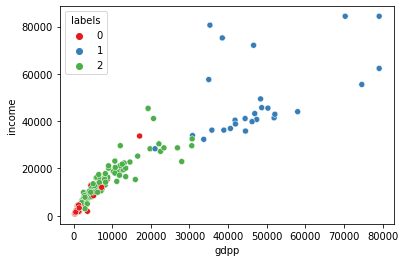

In [34]:
sns.scatterplot(x='gdpp', y='income', hue='labels', data=dat, palette='Set1');


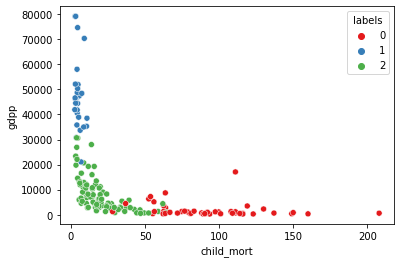

In [35]:
sns.scatterplot(x='child_mort', y='gdpp', hue='labels', data=dat, palette='Set1');

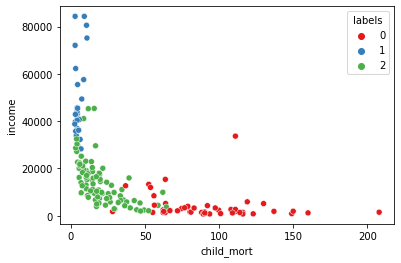

In [36]:
sns.scatterplot(x='child_mort', y='income', hue='labels', data=dat, palette='Set1');

# Cluster Profiling:

In [37]:
dat[['child_mort','gdpp','income','labels']].groupby('labels').mean()

,child_mort,gdpp,income
labels,,,
0,91.610417,1911.400833,3901.010000
1,5.092593,47476.888889,49057.333333
2,20.177174,8226.869565,14169.456522


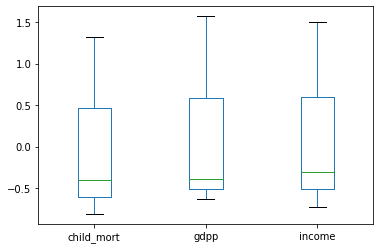

In [81]:
dat1[['child_mort','gdpp','income','labels']].groupby('labels').mean().plot(kind='box')

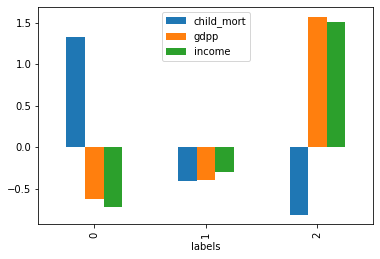

In [82]:
dat1[['child_mort','gdpp','income','labels']].groupby('labels').mean().plot(kind='bar')

# Identifying the countries once you have identified the cluster

In [83]:
c1 = dat[dat['labels']==0]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,0
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,0
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,0
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,0
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,45.90,75.4,2.47,13500.0,0


In [85]:
c1.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
109,Nepal,47.0,70.4688,31.08000,215.488,1990.0,15.10,68.3,2.61,592.0,0
146,Tajikistan,52.4,109.9620,44.13240,432.468,2110.0,12.50,69.6,3.51,738.0,0
12,Bangladesh,49.4,121.2800,26.71592,169.281,2440.0,7.14,70.4,2.33,758.0,0
27,Cambodia,44.4,425.2260,44.64480,467.670,2520.0,3.12,66.1,2.88,786.0,0
83,Kyrgyz Republic,29.6,454.0800,54.38400,718.960,2790.0,10.00,68.5,3.10,880.0,0
107,Myanmar,64.4,70.4688,26.71592,169.281,3720.0,7.04,66.8,2.41,988.0,0
164,Vietnam,23.3,943.2000,89.60400,1050.620,4490.0,12.10,73.1,1.95,1310.0,0
69,India,58.8,305.1000,54.67500,365.850,4410.0,8.98,66.2,2.60,1350.0,0
161,Uzbekistan,36.3,437.4600,80.17800,393.300,4240.0,16.50,68.8,2.34,1380.0,0
102,Moldova,17.2,638.9600,190.71000,1279.550,3910.0,11.10,69.7,1.27,1630.0,0


# KMeans with K==4

In [88]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(dat1)
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 0,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 3, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [89]:
# Now we will assign labels to our original df
dat['labels'] = kmeans.labels_

In [90]:
dat.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


# visualise

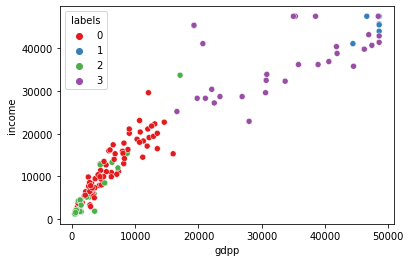

In [91]:
sns.scatterplot(x='gdpp', y='income', hue='labels', data=dat, palette='Set1');

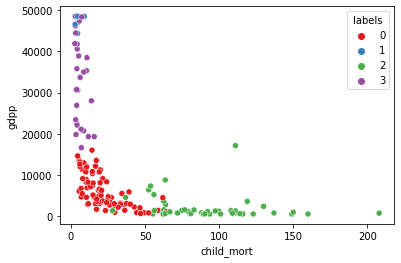

In [92]:
sns.scatterplot(x='child_mort', y='gdpp', hue='labels', data=dat, palette='Set1');

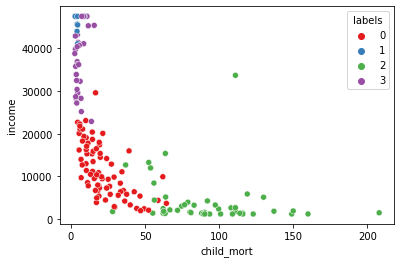

In [93]:
sns.scatterplot(x='child_mort', y='income', hue='labels', data=dat, palette='Set1');

## Cluster Profiling

In [94]:
dat[['child_mort','gdpp','income','labels']].groupby('labels').mean()

,child_mort,gdpp,income
labels,,,
0,22.157500,5962.150000,11478.6250
1,4.400000,47869.888889,45985.0000
2,91.610417,1926.231250,3955.5625
3,6.053333,33459.800000,36738.4000


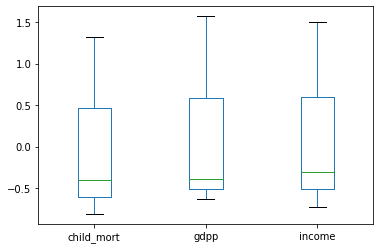

In [95]:
dat1[['child_mort','gdpp','income','labels']].groupby('labels').mean().plot(kind='box')

# Hierarchial Clustering

In [51]:
dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569638,-0.566983,-0.598844,-0.851772,0.157336,-1.619092,1.902882,-0.702314
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.387025,-0.312347,0.647866,-0.859973,-0.498775
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.221124,0.789274,0.670423,-0.038404,-0.477483
3,2.007808,-0.381264,-0.534113,-0.464070,-0.612136,1.387054,-1.179234,2.128151,-0.531000
4,-0.695634,-0.086754,-0.178431,0.139659,0.125202,-0.601749,0.704258,-0.541946,-0.032079


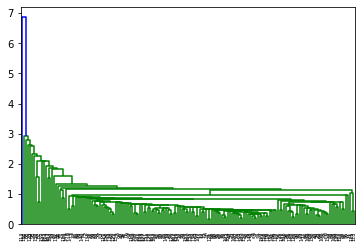

In [52]:
# single linkage
mergings = linkage(dat1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

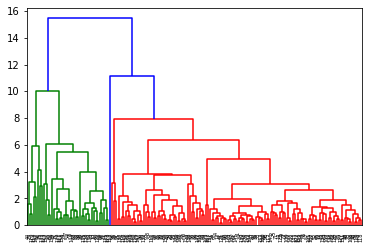

In [53]:
# complete linkage
mergings = linkage(dat1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [54]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# assign cluster labels
dat1['cluster_labels'] = cluster_labels
dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.291532,-0.569638,-0.566983,-0.598844,-0.851772,0.157336,-1.619092,1.902882,-0.702314,0
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.387025,-0.312347,0.647866,-0.859973,-0.498775,0
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.221124,0.789274,0.670423,-0.038404,-0.477483,0
3,2.007808,-0.381264,-0.534113,-0.464070,-0.612136,1.387054,-1.179234,2.128151,-0.531000,0
4,-0.695634,-0.086754,-0.178431,0.139659,0.125202,-0.601749,0.704258,-0.541946,-0.032079,0


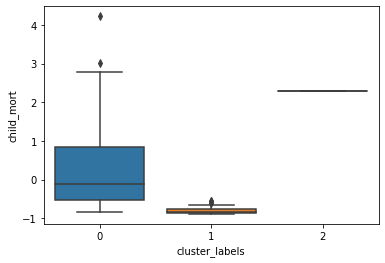

In [56]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=dat1)

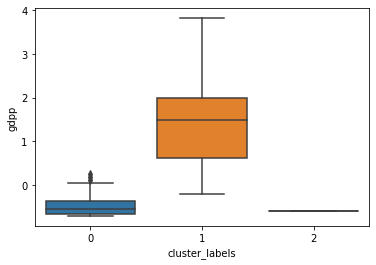

In [98]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=dat1)

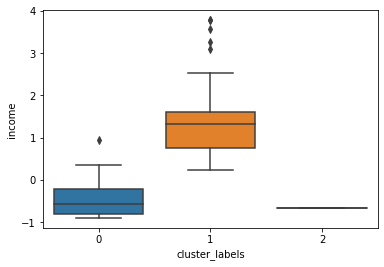

In [99]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=dat1)

In [100]:
# 2 clusters
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [101]:
# assign cluster labels
dat1['cluster_labels'] = cluster_labels
dat1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,labels
0,1.291532,-0.569638,-0.566983,-0.598844,-0.851772,0.157336,-1.619092,1.902882,-0.702314,0,0
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.387025,-0.312347,0.647866,-0.859973,-0.498775,0,1
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.221124,0.789274,0.670423,-0.038404,-0.477483,0,1
3,2.007808,-0.381264,-0.534113,-0.464070,-0.612136,1.387054,-1.179234,2.128151,-0.531000,0,0
4,-0.695634,-0.086754,-0.178431,0.139659,0.125202,-0.601749,0.704258,-0.541946,-0.032079,0,1


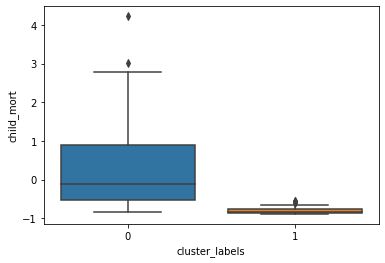

In [102]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=dat1)

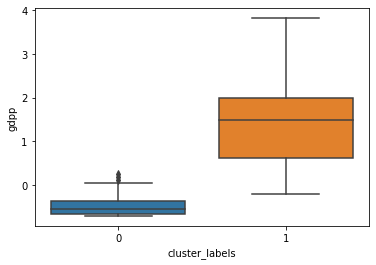

In [103]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=dat1)

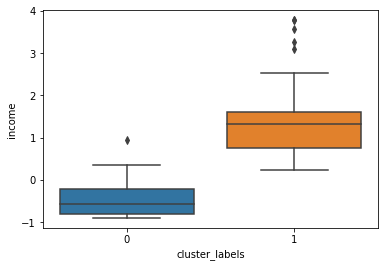

In [104]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=dat1)